In [1]:
## ============================================================================
## Chris Castañeda-Barajas (chrisscastaneda@gmail.com)
## Final Project - Legislative Analysis using Natural Language Processing
## DATASCI 350: Methods for Data Analysis
## 2014.06.02
## ============================================================================

In [6]:
getwd()
# list.dirs()
list.files()

[1] "/Users/chriscastaneda-barajas/Dropbox/UW_DATA_SCIENCE/class-2/final_project"

[1] "crime_bills_in_wi.csv"                                       
 [2] "DS350_Final_Project_Proposal.docx"                           
 [3] "extension1.R"                                                
 [4] "final_project_R.txt"                                         
 [5] "final_project_writeup.docx"                                  
 [6] "final_project_writeup.pdf"                                   
 [7] "final_project.log"                                           
 [8] "final_project.R"                                             
 [9] "IndividualProjectOverview.docx"                              
[10] "Legislative Analysis using Natural Language Processing.ipynb"
[11] "lid"                                                         
[12] "Potential_Project_Ideas.docx"                                
[13] "Previously tackled problems.docx"                            
[14] "rough_draft_final_project.R"                                 
[15] "San Francisco crime and Tweets.pdf"                          
[16] "scrapers"                                                    
[17] "scrapers.zip"                                                
[18] "temp"

In [10]:
source("final_project.R")

In [11]:
  # ---------------------------------------------------------------------------
  #                             RUN UNIT TEST
  # ---------------------------------------------------------------------------
  test.NormalizeText()

[1] TRUE

In [12]:
  # ---------------------------------------------------------------------------
  #                              SETUP LOGGING
  # ---------------------------------------------------------------------------
  basicConfig()
  addHandler(writeToFile, logger="data_logger", file="final_project.log")
  loginfo(paste(":JUPYTER:\n",
                "     TEXT MINING WISCONSIN STATE LEGISLATURE     \n",
                "--------------------------------------------------"),
          logger="data_logger")

2016-07-12 23:08:58 INFO:data_logger::JUPYTER:
      TEXT MINING WISCONSIN STATE LEGISLATURE     
 --------------------------------------------------


In [13]:
  # ---------------------------------------------------------------------------
  #                               LOAD DATA
  # ---------------------------------------------------------------------------
  
  ## Examples of ALEC Model Legislation related to Guns, Prisons, Crime and Immigration.
  ## Examples have been identified by subject matter experts at the Center for Media
  ## and Democracy and ALEC Exposed.
  ## Extracted from: http://www.alecexposed.org/wiki/Bills_related_to_Guns,_Prisons,_Crime,_and_Immigration
  ## To be used to develop a target vector used to mine raw legislative text data
  crimebills <- as.data.frame(fromJSON('./scrapers/data/alec_exposed/crime_bills3.json'))

  ## WISCONSIN STATE LEGISLATIVE TEXTS
  ## The text of nearly every piece of legislation introduced into the Wisconsin 
  ## state legislature for the past two decades.  Legislation prior to the 1995
  ## biennium are not easily accessible in a digital format .
                                                                           #  SIZE  DOC COUNT
  wi1995 <- as.data.frame(fromJSON('./scrapers/data/wi_1995_bills.json'))  #  21MB  2,000 docs
  wi1997 <- as.data.frame(fromJSON('./scrapers/data/wi_1997_bills.json'))  #  37MB  1,750 docs
  ## web scraper bot had issues extracting bills from 1999 biennium, WI website had inconsistencies
  wi2001 <- as.data.frame(fromJSON('./scrapers/data/wi_2001_bills.json'))  #  22MB  1,707 docs
  wi2003 <- as.data.frame(fromJSON('./scrapers/data/wi_2003_bills.json'))  #  22MB  1,818 docs
  wi2005 <- as.data.frame(fromJSON('./scrapers/data/wi_2005_bills.json'))  #  25MB  2,249 docs
  wi2007 <- as.data.frame(fromJSON('./scrapers/data/wi_2007_bills.json'))  #  28MB  1,875 docs
  wi2009 <- as.data.frame(fromJSON('./scrapers/data/wi_2009_bills.json'))  #  29MB  1,994 docs
  wi2011 <- as.data.frame(fromJSON('./scrapers/data/wi_2011_bills.json'))  #  25MB  1,669 docs
  wi2013 <- as.data.frame(fromJSON('./scrapers/data/wi_2013_bills.json'))  #  24MB  1,898 docs
  ## web scrapper also had issues with 2015 biennium
                                                                   # TOTALS: 233MB 16,960 total documents 
  
  

In [14]:
  # ---------------------------------------------------------------------------
  #                               CLEAN DATA
  # ---------------------------------------------------------------------------
  
  ## Add a biennium column to each legislative data set
  wi1995$biennium <- rep(1995, nrow(wi1995))
  wi1997$biennium <- rep(1997, nrow(wi1997))
  wi2001$biennium <- rep(2001, nrow(wi2001))
  wi2003$biennium <- rep(2003, nrow(wi2003))
  wi2005$biennium <- rep(2005, nrow(wi2005))
  wi2007$biennium <- rep(2007, nrow(wi2007))
  wi2009$biennium <- rep(2009, nrow(wi2009))
  wi2011$biennium <- rep(2011, nrow(wi2011))
  wi2013$biennium <- rep(2013, nrow(wi2013))

  ## Stack them all together
  WI <- rbind(wi1995, wi1997, wi2001, wi2003, wi2005, wi2007, wi2009, wi2011, wi2013)
  
  ## Clean up the column names
  names(crimebills) <- c('id', 'text')
  names(WI) <- c('id', 'text', 'biennium')
  
  ## Add bill urls to data for reference later
  url <- sapply(WI$id, function(id) BillUrl(id))
  WI$url <- url
  
  ## Normalize text data
  crimebills$normalized <- NormalizeText(crimebills$text)
  WI$normalized <- NormalizeText(WI$text)
  

In [15]:
## Take a quick look at data
head(WI)

id
1 WI_1995_REG_AB272
2 WI_1995_REG_AB273
3 WI_1995_REG_AB274
4 WI_1995_REG_AB275
5 WI_1995_REG_AB276
6 WI_1995_REG_AB277
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [16]:
  # ---------------------------------------------------------------------------
  #                         FEATURE ENGINEERING
  # ---------------------------------------------------------------------------
  
  ## Generate key words for target vector
  target.tfidf <- TFIDFList(crimebills$normalized)
  length(names(target.tfidf))  # 2209
  
  ## Develop a Document Term Matrix for all legislative data
  WI.corpus <- Corpus(VectorSource(WI$normalized))
  WI.terms <- DocumentTermMatrix(WI.corpus)
  dim(WI.terms)  # 16340 20078
  
  ### SOME EXPLORING ###
  length(intersect( names(target.tfidf), names(as.data.frame(as.matrix(WI.terms))) ))  # 2194
  length(intersect( names(target.tfidf[1:100]), names(as.data.frame(as.matrix(WI.terms))) ))  # 99
  
  ## Use most important terms as index to subset other objects
  crime_terms_index <- intersect( names(target.tfidf[1:100]), names(as.data.frame(as.matrix(WI.terms))) )
  
  ## Reduce WI document-term-matrix to just terms that will be relavant to the target vector
  WI.crimeTerms <- WI.terms[ , crime_terms_index]
  WI.crimeTerms <- as.data.frame(as.matrix(WI.crimeTerms))
  
  loginfo(paste(" Crime Policy Model Legislation Terms to be used in target vector:\n"), logger="data_logger")
  loginfo(paste( names(WI.crimeTerms)), logger="data_logger")
  
  names(WI.crimeTerms)
  #[1] "sentenc"   "convict"   "firearm"   "violat"    "commit"    "offens"    "nation"    "determin" 
  #[9] "offend"    "report"    "juvenil"   "constitut" "licens"    "meet"      "correct"   "decemb"   
  #[17] "appear"    "requir"    "cite"      "penalti"   "permit"    "januari"   "establish" "mail"     
  #[25] "oper"      "enact"     "issu"      "particip"  "full"      "test"      "releas"    "program"  
  #[33] "provid"    "task"      "bill"      "offic"     "crime"     "polici"    "feloni"    "theft"    
  #[41] "enter"     "applic"    "adopt"     "adult"     "prohibit"  "august"    "restrict"  "summit"   
  #[49] "prison"    "attempt"   "forc"      "commun"    "relat"     "place"     "author"    "allow"    
  #[57] "american"  "insert"    "probat"    "increas"   "agenc"     "case"      "jurisdict" "notifi"   
  #[65] "defend"    "resid"     "court"     "limit"     "director"  "proceed"   "charg"     "justic"   
  #[73] "incarcer"  "individu"  "complet"   "code"      "post"      "appropri"  "request"   "protect"  
  #[81] "investig"  "receiv"    "file"      "repeal"    "annual"    "term"      "know"      "victim"   
  #[89] "possess"   "short"     "reason"    "known"     "etc"       "implement" "year"      "statut"   
  #[97] "make"      "carri"     "consid"   
  

[1] 2209

[1] 16340 20078

[1] 2194

[1] 99

2016-07-12 23:17:21 INFO:data_logger:Crime Policy Model Legislation Terms to be used in target vector:
2016-07-12 23:17:21 INFO:data_logger:sentenc
 2016-07-12 23:17:21 INFO:data_logger:convict
 2016-07-12 23:17:21 INFO:data_logger:firearm
 2016-07-12 23:17:21 INFO:data_logger:violat
 2016-07-12 23:17:21 INFO:data_logger:commit
 2016-07-12 23:17:21 INFO:data_logger:offens
 2016-07-12 23:17:21 INFO:data_logger:nation
 2016-07-12 23:17:21 INFO:data_logger:determin
 2016-07-12 23:17:21 INFO:data_logger:offend
 2016-07-12 23:17:21 INFO:data_logger:report
 2016-07-12 23:17:21 INFO:data_logger:juvenil
 2016-07-12 23:17:21 INFO:data_logger:constitut
 2016-07-12 23:17:21 INFO:data_logger:licens
 2016-07-12 23:17:21 INFO:data_logger:meet
 2016-07-12 23:17:21 INFO:data_logger:correct
 2016-07-12 23:17:21 INFO:data_logger:decemb
 2016-07-12 23:17:21 INFO:data_logger:appear
 2016-07-12 23:17:21 INFO:data_logger:requir
 2016-07-12 23:17:21 INFO:data_logger:cite
 2016-07-12 23:17:21 INFO:data_logger

[1] "sentenc"   "convict"   "firearm"   "violat"    "commit"    "offens"   
 [7] "nation"    "determin"  "offend"    "report"    "juvenil"   "constitut"
[13] "licens"    "meet"      "correct"   "decemb"    "appear"    "requir"   
[19] "cite"      "penalti"   "permit"    "januari"   "establish" "mail"     
[25] "oper"      "enact"     "issu"      "particip"  "full"      "test"     
[31] "releas"    "program"   "provid"    "task"      "bill"      "offic"    
[37] "crime"     "polici"    "feloni"    "theft"     "enter"     "applic"   
[43] "adopt"     "adult"     "prohibit"  "august"    "restrict"  "summit"   
[49] "prison"    "attempt"   "forc"      "commun"    "relat"     "place"    
[55] "author"    "allow"     "american"  "insert"    "probat"    "increas"  
[61] "agenc"     "case"      "jurisdict" "notifi"    "defend"    "resid"    
[67] "court"     "limit"     "director"  "proceed"   "charg"     "justic"   
[73] "incarcer"  "individu"  "complet"   "code"      "post"      "appropri" 
[79] "request"   "protect"   "investig"  "receiv"    "file"      "repeal"   
[85] "annual"    "term"      "know"      "victim"    "possess"   "short"    
[91] "reason"    "known"     "etc"       "implement" "year"      "statut"   
[97] "make"      "carri"     "consid"

In [17]:
  # ---------------------------------------------------------------------------
  #                             DATA MODELING
  # ---------------------------------------------------------------------------
  
  ## Create the target vector
  targetVector <- NormalizeVector(as.matrix(as.numeric(target.tfidf[crime_terms_index])))
  
  ## Set weights for document vector terms
  weights <- as.numeric(target.tfidf[crime_terms_index])
  
  ## Generate a relavancy model for each document by caluclating the the cosine
  ## similarity between the target vector and each document vector
  relevancyModel <- sapply(1:nrow(WI.crimeTerms), function (i) {
    terms <- as.matrix(as.numeric(WI.crimeTerms[i,]))
    documentVector <- NormalizeVector( terms * weights )
    return( CosineSimilarity(t(targetVector), t(documentVector)) )
  })
  WI$relevancy <- relevancyModel
  

[1] 0.2703352

[1] 0.1157261

[1] 0.5017875

[1] 0.6175136

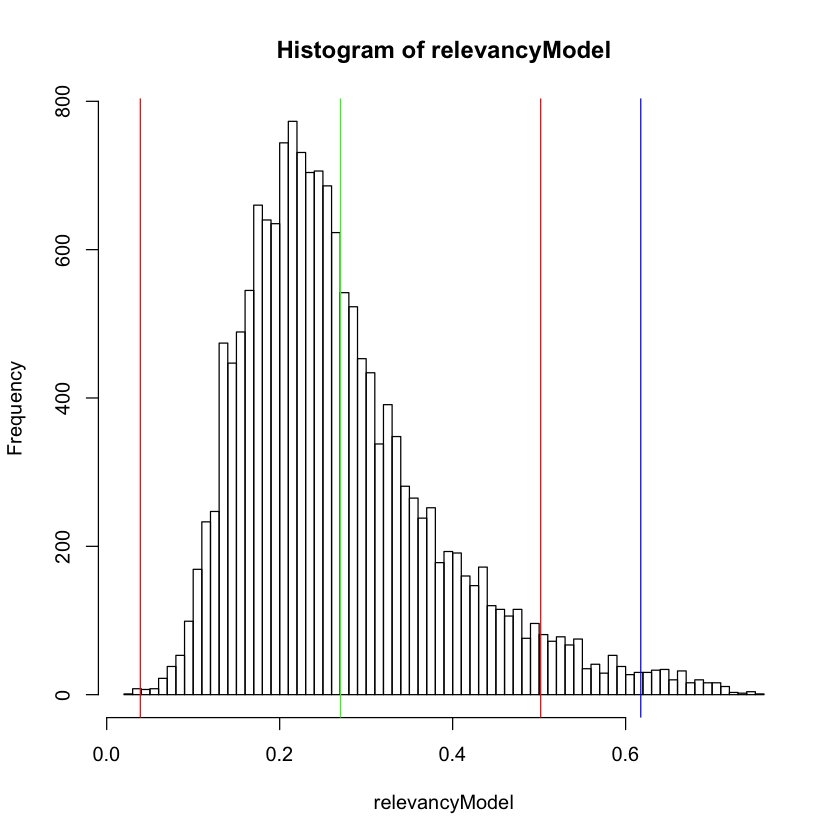

In [18]:
  ## Plot a histogram of my relevancy model scores
  hist(relevancyModel, breaks=100)
  mean(relevancyModel) # 0.2703352
  sd(relevancyModel) # 0.1157261
  mean(relevancyModel)+2*sd(relevancyModel) # 0.5017875
  mean(relevancyModel)+3*sd(relevancyModel) # 0.6175136
  abline(v=mean(relevancyModel),col="green")
  abline(v=mean(relevancyModel)+2*sd(relevancyModel),col="red")
  abline(v=mean(relevancyModel)-2*sd(relevancyModel),col="red")
  abline(v=mean(relevancyModel)+3*sd(relevancyModel),col="blue")
  

In [19]:
  # ---------------------------------------------------------------------------
  #                            LOG RESULTS
  # ---------------------------------------------------------------------------
  
  ## Whittle results down to the most relavant bills
  plus3sigmas <- mean(relevancyModel)+3*sd(relevancyModel)
  results <- WI[c('id', 'biennium', 'url', 'relevancy')]
  results <- results[results$relevancy >= plus3sigmas, ]
  results <- results[order(-results$relevancy), ]
  
  write.csv(results, 'crime_bills_in_wi_2.csv')
  
  loginfo(paste('Results have been written to: crime_bills_in_wi_2.csv' ), logger="data_logger")
  

2016-07-12 23:20:24 INFO:data_logger:Results have been written to: crime_bills_in_wi_2.csv


In [22]:

results

,id,biennium,url,relevancy
3226,WI_1997_REG_SB345,1997,http://docs.legis.wisconsin.gov/document/proposaltext/1997/REG/SB345,0.750554101587345
6085,WI_2003_REG_SB2,2003,http://docs.legis.wisconsin.gov/document/proposaltext/2003/REG/SB2,0.749952857377603
2089,WI_1997_REG_AB351,1997,http://docs.legis.wisconsin.gov/document/proposaltext/1997/REG/AB351,0.74749498813682
3111,WI_1997_REG_SB233,1997,http://docs.legis.wisconsin.gov/document/proposaltext/1997/REG/SB233,0.74749498813682
1719,WI_1997_AP8_AB1,1997,http://docs.legis.wisconsin.gov/document/proposaltext/1997/AP8/AB1,0.743774075899047
4861,WI_2001_REG_SB496,2001,http://docs.legis.wisconsin.gov/document/proposaltext/2001/REG/SB496,0.736555844631689
1644,WI_1995_REG_SB668,1995,http://docs.legis.wisconsin.gov/document/proposaltext/1995/REG/SB668,0.730107248143827
4693,WI_2001_REG_SB328,2001,http://docs.legis.wisconsin.gov/document/proposaltext/2001/REG/SB328,0.72995744373876
14842,WI_2013_REG_AB383,2013,http://docs.legis.wisconsin.gov/document/proposaltext/2013/REG/AB383,0.72612720065043
2388,WI_1997_REG_AB648,1997,http://docs.legis.wisconsin.gov/document/proposaltext/1997/REG/AB648,0.723642944444799
